# Canonical Discriminant Analysis on Iris dataset

In [1]:
from seaborn import load_dataset
iris = load_dataset("iris")
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [2]:
# Chargement de la 
from scientisttools.discriminant_analysis import CANDISC

candisc = CANDISC(n_components=2,
                  target=["species"],
                  row_labels=iris.index,
                  features_labels=list(iris.columns[:-1]))

# Instanciattion
candisc.fit(iris)

CANDISC(features_labels=['sepal_length', 'sepal_width', 'petal_length',
                         'petal_width'],
        n_components=2, row_labels=RangeIndex(start=0, stop=150, step=1),
        target=['species'])

### Summary Information

In [3]:
candisc.summary_information_.T

,Total Sample Size,Variables,Classes,DF Total,DF Within Classes,DF Between Classes
value,150,4,3,149,147,2


#### Class level Information

In [4]:
candisc.class_level_information_

,Frequency,Proportion
species,,
setosa,50,0.333333
versicolor,50,0.333333
virginica,50,0.333333


### Squared Mahalanobis Distances and Distance statistics

In [5]:
candisc.squared_mdist_

,setosa,versicolor,virginica
setosa,0.000000,89.864186,179.384713
versicolor,89.864186,0.000000,17.201066
virginica,179.384713,17.201066,0.000000


In [6]:
# Univariate statistics
candisc.univariate_test_statistis_

,Std. Dev.,R-squared,Rsq/(1-Rsq),F-statistic,Prob (F-statistic)
sepal_length,0.828066,0.618706,1.622646,119.264502,1.669669e-31
sepal_width,0.435866,0.400783,0.668844,49.160040,4.492017e-17
petal_length,1.765298,0.941372,16.056615,1180.161182,2.856777e-91
petal_width,0.762238,0.928883,13.061322,960.007147,4.169446e-85


In [7]:
print(candisc.anova_["sepal_length"])

               sum_sq     df    mean_sq           F        PR(>F)    eta_sq  \
C(species)  63.212133    2.0  31.606067  119.264502  1.669669e-31  0.618706   
Residual    38.956200  147.0   0.265008         NaN           NaN       NaN   

            omega_sq  
C(species)  0.611931  
Residual         NaN  


In [8]:
# Multivariate
# Ne pas oublier la fonction print
print(candisc.manova_)

                   Multivariate linear model
                                                                
----------------------------------------------------------------
        species          Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0234 8.0000 288.0000  199.1453 0.0000
         Pillai's trace  1.1919 8.0000 290.0000   53.4665 0.0000
 Hotelling-Lawley trace 32.4773 8.0000 203.4024  582.1970 0.0000
    Roy's greatest root 32.1919 4.0000 145.0000 1166.9574 0.0000



In [9]:
# Likelihood test
candisc.likelihood_test_

,statistic,DDL num.,DDL den.,Pr>F
0,199.145344,8.0,288.0,1.110223e-16
1,13.793900,3.0,145.0,5.794465e-08


In [10]:
candisc.eig_.T

array([[ 32.1919292 ,  31.90653816,  99.1212605 ,  99.1212605 ],
       [  0.28539104,          nan,   0.8787395 , 100.        ]])

In [11]:
## Correlation between Canonical and Original Variables
# Total Canonical Structure
print(candisc.tcorr_)

                   LD1       LD2
sepal_length  0.791888  0.217593
sepal_width  -0.530759  0.757989
petal_length  0.984951  0.046037
petal_width   0.972812  0.222902


In [12]:
# Between Cabnonical Structure
print(candisc.bcorr_)

                   LD1       LD2
sepal_length  0.991468  0.130348
sepal_width  -0.825658  0.564171
petal_length  0.999750  0.022358
petal_width   0.994044  0.108977


In [13]:
# Withon Canonical Structure
print(candisc.wcorr_)

                   LD1       LD2
sepal_length  0.222596  0.310812
sepal_width  -0.119012  0.863681
petal_length  0.706065  0.167701
petal_width   0.633178  0.737242


In [14]:
# Raw Canonical Coefficients
candisc.coef_

array([[-0.82937764,  0.02410215],
       [-1.53447307,  2.16452123],
       [ 2.20121166, -0.93192121],
       [ 2.81046031,  2.83918785]])

In [15]:
# Class Means on Canonical Variables
candisc.gmean_coord_

,LD1,LD2
species,,
setosa,-7.607600,0.215133
versicolor,1.825049,-0.727900
virginica,5.782550,0.512767


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


ValueError: 'c' argument has 3 elements, which is inconsistent with 'x' and 'y' with size 150.

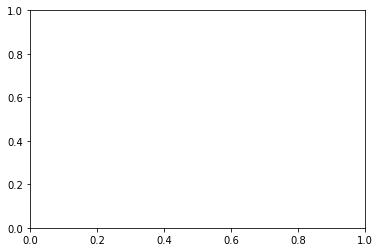

In [16]:
from scientisttools.pyplot import plotCANDISC
plotCANDISC(candisc)